# Filter Compounds

In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-08 10:07:38--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  84.75M   180MB/s    in 0.5s    

2020-07-08 10:07:39 (180 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [88867207/88867207]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - ca-certificates==2020.1.1=0
    - certifi==2020.4.5.1=py37_0
    - cffi==1.14.0=py37he30daa8_1
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.1=py37h7b6447c_0
    - conda==4.8.3=py37_0
    - c

In [ ]:
!git clone https://github.com/PatWalters/rd_filters

Cloning into 'rd_filters'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 78 (delta 11), reused 21 (delta 8), pack-reused 53
Unpacking objects: 100% (78/78), done.


In [ ]:
%cd rd_filters/

/content/rd_filters


In [ ]:
pip install .

Processing /content/rd_filters
  Created wheel for rd-filters: filename=rd_filters-0.1-py3-none-any.whl size=33803 sha256=28905caf439458a01a9b7d26b8439e5e3c59c63bb26161a8aa969c2d5c354dbd
  Stored in directory: /tmp/pip-ephem-wheel-cache-zdf2ii_x/wheels/56/24/d7/4752c8b3ace86c59df2975093c9af8f086670481da9bc20861
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=e7f8b72d68cb8c763fb49102cab56098f64454e6c5f7263dbf0ad5b31b7561a8
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built rd-filters docopt


In [ ]:
!rd_filters -h

Usage:
rd_filters filter --in INPUT_FILE --prefix PREFIX [--rules RULES_FILE_NAME] [--alerts ALERT_FILE_NAME][--np NUM_CORES]
rd_filters template --out TEMPLATE_FILE [--rules RULES_FILE_NAME]

Options:
--in INPUT_FILE input file name
--prefix PREFIX prefix for output file names
--rules RULES_FILE_NAME name of the rules JSON file
--alerts ALERTS_FILE_NAME name of the structural alerts file
--np NUM_CORES the number of cpu cores to use (default is all)
--out TEMPLATE_FILE parameter template file name


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving zinc_100k.smi to zinc_100k.smi
User uploaded file "zinc_100k.smi" with length 6207249 bytes


In [ ]:
%ls

HIV.smi  MANIFEST.in  rd_filters/  setup.py
LICENSE  Notes.txt    README.md    zinc_100k.smi


In [ ]:
%cat zinc_100k.smi|wc -l

100000


In [ ]:
!rd_filters filter --in zinc_100k.smi --prefix zinc

using 2 cores
Using alerts from Inpharmatica
Wrote SMILES for molecules passing filters to zinc.smi
Wrote detailed data to zinc.csv
68410 of 100000 passed filters 68.4%
Elapsed time 93.27 seconds


In [ ]:
%ls

HIV.smi  MANIFEST.in  rd_filters/  setup.py       zinc.csv
LICENSE  Notes.txt    README.md    zinc_100k.smi  zinc.smi


In [ ]:
import pandas as pd
zinc_df = pd.read_csv("zinc.csv")
zinc_df.head()


,SMILES,NAME,FILTER,MW,LogP,HBD,HBA,TPSA,Rot
0,CN(CCO)C[C@@H](O)Cn1cnc2c1c(=O)n(C)c(=O)n2C,ZINC000000000843,Filter82_pyridinium > 0,311.342,-2.2813,2,9,105.52,6
1,O=c1[nH]c(=O)n([C@@H]2C[C@@H](O)[C@H](CO)O2)cc1Br,ZINC000000001063,Filter9_metal > 0,307.100,-1.0602,3,6,104.55,2
2,Cn1c2ncn(CC(=O)N3CCOCC3)c2c(=O)n(C)c1=O,ZINC000000003942,Filter82_pyridinium > 0,307.310,-1.7075,0,8,91.36,2
3,CN1C(=O)C[C@H](N2CCN(C(=O)CN3CCCC3)CC2)C1=O,ZINC000000036436,OK,308.382,-1.0163,0,5,64.17,3
4,CC(=O)NC[C@H](O)[C@H]1O[C@H]2OC(C)(C)O[C@H]2[C...,ZINC000000041101,OK,302.327,-1.1355,3,6,106.12,4


In [ ]:
from collections import Counter
count_list = list(Counter(zinc_df.FILTER).items())
count_df = pd.DataFrame(count_list,columns=["Rule","Count"])
count_df.sort_values("Count",inplace=True,ascending=False)
count_df.head()

,Rule,Count
2,OK,69148
7,Filter41_12_dicarbonyl > 0,19330
0,Filter82_pyridinium > 0,7713
11,Filter93_acetyl_urea > 0,1541
12,Filter78_bicyclic_Imide > 0,825


In [ ]:
smiles_list = zinc_df[zinc_df.FILTER == "Filter41_12_dicarbonyl > 0"].SMILES[:10]


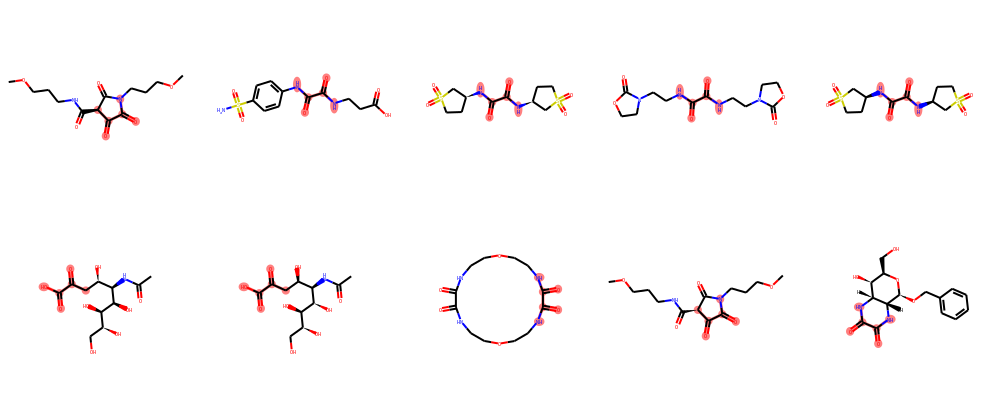

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
dicarbonyl = Chem.MolFromSmarts('*C(=O)C(=O)*')
match_list = [mol.GetSubstructMatch(dicarbonyl) for mol in mol_list]
Draw.MolsToGridImage(mol_list,highlightAtomLists=match_list,molsPerRow=5)

In [ ]:
OK_df = zinc_df.query('FILTER == \'OK\'').copy()
OK_df.to_csv('zinc_69k.csv')

In [ ]:
%cat zinc_69k.csv

In [ ]:
from google.colab import files
files.download('zinc_69k.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>